In [9]:
import pandas as pd
import numpy as np
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

import seaborn as sns


In [10]:
# Part A - Q1 A - Read the ‘Signals.csv’ as DatFrame and import required libraries.

df = pd.read_csv('NN Project Data - Signal.csv')
df

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
# Part A - Q1 B - Check for missing values and print percentage for each attribute.

missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_percentages

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

In [13]:
# Part A - Q1 C - Check for presence of duplicate records in the dataset and impute with appropriate method.
df[df.duplicated()]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [14]:
target_counts = df['Signal_Strength'].value_counts()
target_counts

Signal_Strength
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='Signal_Strength'>

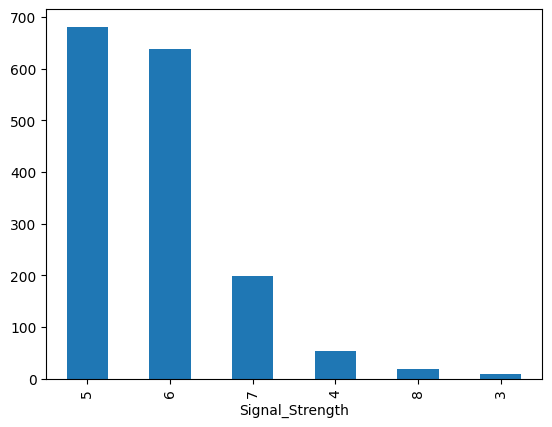

In [15]:
# Part A - Q1 D - Visualise distribution of the target variable.

target_counts.plot(kind='bar')


(-1.0999999036346852,
 1.0999990803274424,
 -1.0999899120726624,
 1.0999990968580395)

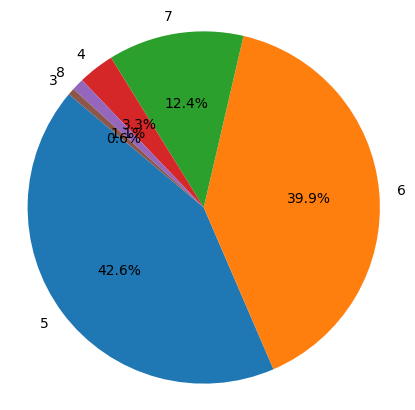

In [16]:
plt.figure(figsize=(5, 5))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


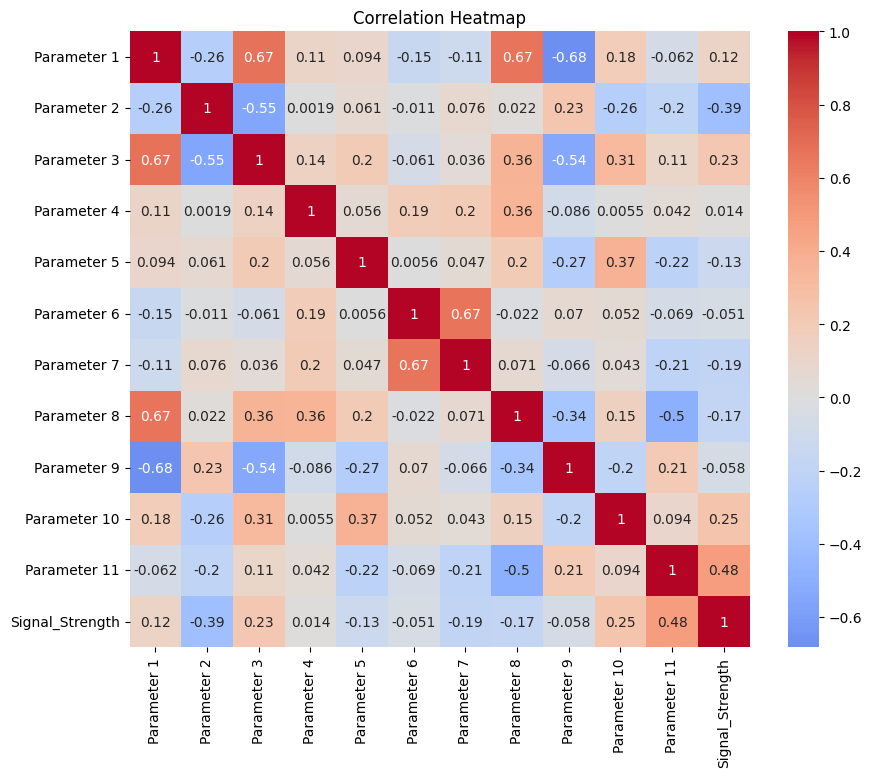

In [17]:
# Part A - Q1 E - Share insights from the initial data analysis (at least 2).
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# parameter (8, 1) , (1,3) are correlated
# signal 5.6 have maximum data points 
# parameter 1 and 3 have linear relation 
# parameter 2 and 3 have inverse relation

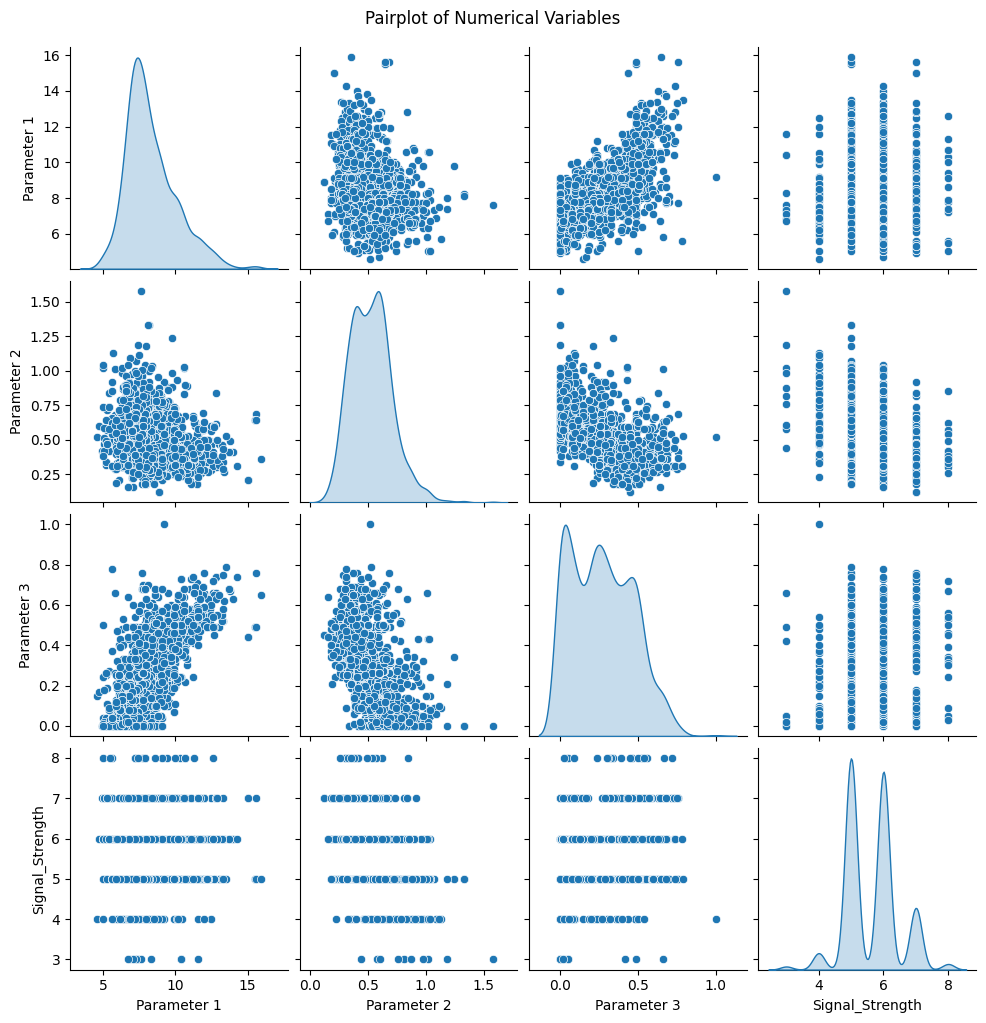

In [19]:
sns.pairplot(df, vars=['Parameter 1', 'Parameter 2', 'Parameter 3', 'Signal_Strength'], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

In [20]:
#  Split the data into X & Y.
X = df.iloc[:, :-1] # except class column 
print(X.shape)
y = df.iloc[:, -1] #select Class column
print(y.shape)

(1599, 11)
(1599,)


In [21]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)

In [22]:
#  Split the data into train & test with 70:30 proportion.
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.3,stratify=y, random_state = 7)


In [23]:
# rint shape of all the 4 variables and verify if train and test data is in sync.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1119, 11)
(480, 11)
(1119, 6)
(480, 6)


In [24]:
df

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Parameter 1', 'Parameter 4', 'Parameter 6','Parameter 7','Parameter 9','Parameter 11']  # Add the names of columns you want to scale

# Create a copy of the DataFrame with selected columns
X_train = X_train.copy()

# Apply StandardScaler to the selected columns
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


In [26]:
# #  Normalise the train and test data with appropriate method.
# X_train = preprocessing.normalize(X_train)
# y_train = np.array(y_train)
# y_test = np.array(y_test)


In [27]:
# Transform Labels into format acceptable by Neural Network

In [28]:
# Part A - Q3 A - Design a Neural Network to train a classifier.
model = Sequential()

model.add(Dense(64, input_shape = (11,), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))
opt = optimizers.SGD(learning_rate= 0.001)

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 1414 (5.52 KB)
Trainable params: 1286 (5.02 KB)
Non-trainable params: 128 (512.00 Byte)
_________________________________________________________________


In [29]:
# Part A - Q3 B - Train the classifier using previously designed Architecture
base = model.fit(X_train, np.array(y_train), batch_size = 300, epochs = 10, verbose = 2,validation_data= (X_test,y_test))


Epoch 1/10
4/4 - 1s - loss: 2.7530 - accuracy: 0.1251 - val_loss: 1.7531 - val_accuracy: 0.2125 - 1s/epoch - 255ms/step
Epoch 2/10
4/4 - 0s - loss: 2.7491 - accuracy: 0.1260 - val_loss: 1.7522 - val_accuracy: 0.2125 - 74ms/epoch - 19ms/step
Epoch 3/10
4/4 - 0s - loss: 2.7283 - accuracy: 0.1117 - val_loss: 1.7512 - val_accuracy: 0.2146 - 48ms/epoch - 12ms/step
Epoch 4/10
4/4 - 0s - loss: 2.7493 - accuracy: 0.1430 - val_loss: 1.7504 - val_accuracy: 0.2125 - 63ms/epoch - 16ms/step
Epoch 5/10
4/4 - 0s - loss: 2.7316 - accuracy: 0.1314 - val_loss: 1.7493 - val_accuracy: 0.2125 - 47ms/epoch - 12ms/step
Epoch 6/10
4/4 - 0s - loss: 2.6518 - accuracy: 0.1403 - val_loss: 1.7484 - val_accuracy: 0.2167 - 68ms/epoch - 17ms/step
Epoch 7/10
4/4 - 0s - loss: 2.7284 - accuracy: 0.1367 - val_loss: 1.7473 - val_accuracy: 0.2188 - 47ms/epoch - 12ms/step
Epoch 8/10
4/4 - 0s - loss: 2.6634 - accuracy: 0.1385 - val_loss: 1.7461 - val_accuracy: 0.2271 - 47ms/epoch - 12ms/step
Epoch 9/10
4/4 - 0s - loss: 2.617

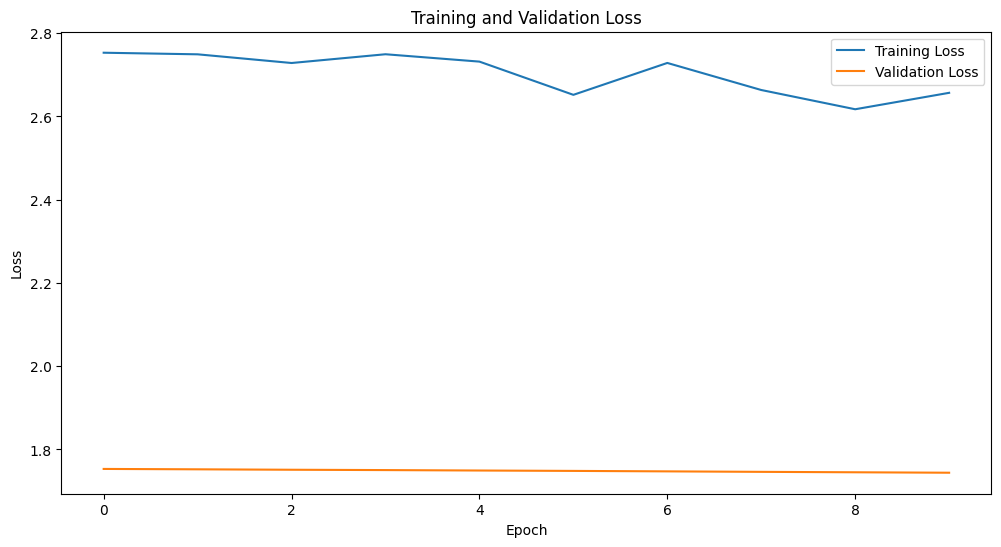

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(base.history['loss'], label='Training Loss')
plt.plot(base.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

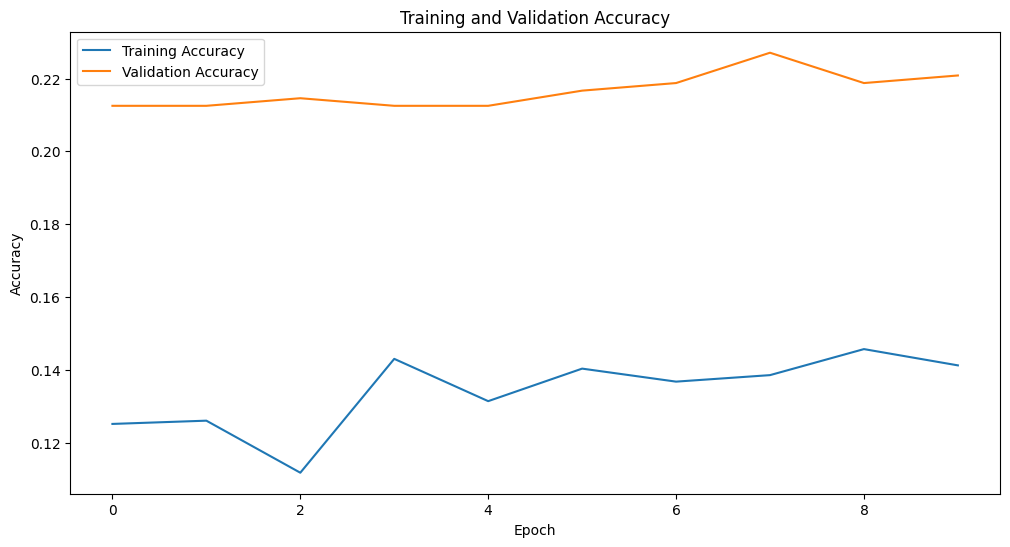

In [31]:
# Plot training accuracy and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(base.history['accuracy'], label='Training Accuracy')
plt.plot(base.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [32]:
# Part A - Q3 D - Design new architecture/update existing architecture in attempt to improve the performance of the model.
# Part A - Q3 A - Design a Neural Network to train a classifier.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras import optimizers

# Create a sequential model
model = Sequential()

# Input layer
model.add(Dense(30, input_shape=(11,), activation='relu'))
# Hidden layers
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(33, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(88, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(44, activation='relu'))
# model.add(Dense(33, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(BatchNormalization())

# Output layer
model.add(Dense(6, activation='softmax'))
# Compile the model
opt = optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                360       
                                                                 
 dense_3 (Dense)             (None, 60)                1860      
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 60)                240       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 88)                5368      
                                                                 
 batch_normalization_2 (Bat  (None, 88)                352       
 chNormalization)                                     

In [34]:
history = model.fit(X_train, np.array(y_train),validation_data= (X_test,y_test),  batch_size = 300, epochs = 200, verbose = 2)


Epoch 1/200
4/4 - 0s - loss: 0.2244 - accuracy: 0.9115 - val_loss: 1.5305 - val_accuracy: 0.6438 - 81ms/epoch - 20ms/step
Epoch 2/200
4/4 - 0s - loss: 0.2599 - accuracy: 0.9062 - val_loss: 1.5221 - val_accuracy: 0.6625 - 76ms/epoch - 19ms/step
Epoch 3/200
4/4 - 0s - loss: 0.2227 - accuracy: 0.9160 - val_loss: 1.5844 - val_accuracy: 0.6687 - 69ms/epoch - 17ms/step
Epoch 4/200
4/4 - 0s - loss: 0.2663 - accuracy: 0.9008 - val_loss: 1.5509 - val_accuracy: 0.6521 - 62ms/epoch - 16ms/step
Epoch 5/200
4/4 - 0s - loss: 0.2323 - accuracy: 0.9115 - val_loss: 1.5440 - val_accuracy: 0.6438 - 64ms/epoch - 16ms/step
Epoch 6/200
4/4 - 0s - loss: 0.2290 - accuracy: 0.9223 - val_loss: 1.5840 - val_accuracy: 0.6562 - 61ms/epoch - 15ms/step
Epoch 7/200
4/4 - 0s - loss: 0.2480 - accuracy: 0.9071 - val_loss: 1.5246 - val_accuracy: 0.6521 - 64ms/epoch - 16ms/step
Epoch 8/200
4/4 - 0s - loss: 0.2443 - accuracy: 0.9053 - val_loss: 1.5604 - val_accuracy: 0.6604 - 62ms/epoch - 15ms/step
Epoch 9/200
4/4 - 0s - l

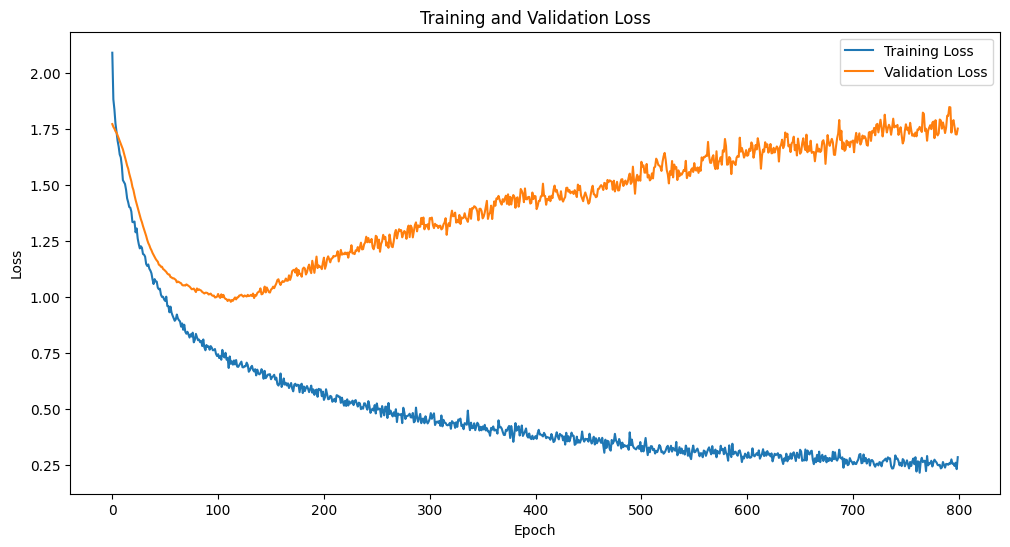

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

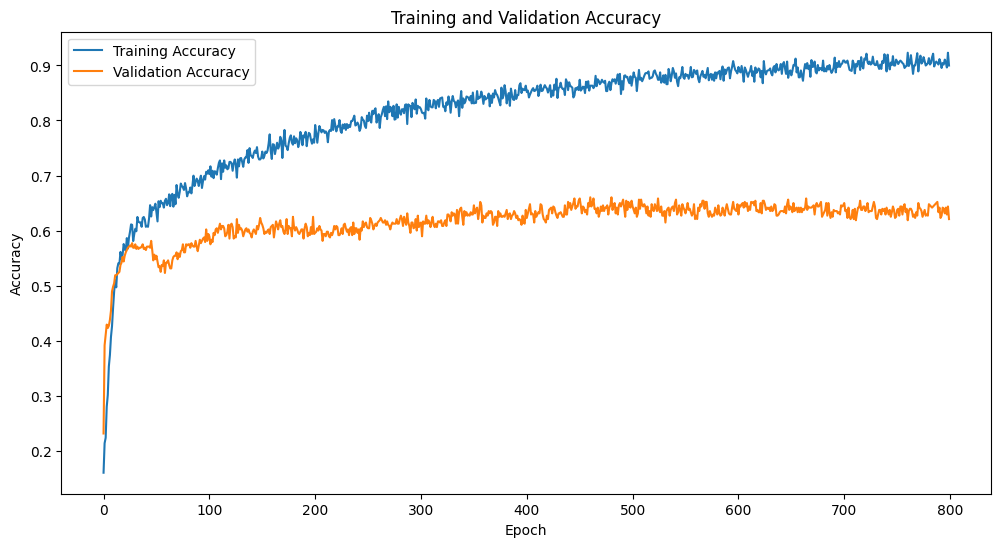

In [25]:
# Plot training accuracy and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Part A - Q3 E - Plot visuals as in Q3.C and share insights about difference observed in both the models.

""" 
Model 1 with 1414 params works well as validattion loss is decreasing with each training iteration also increasing training and validation accuracy
on the other hand Model 2 with 12707 is a over fit model as validaiton accuracy is not increaing while traing accuracy is increasing , training loss is decreasing with increase in validation loss.
    
"""

